In [17]:
import pandas as pd
import numpy as np
from ISLP import confusion_table
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS, summarize)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import RocCurveDisplay

roc_curve = RocCurveDisplay.from_estimator

In [19]:
fusiondat = pd.read_csv("mldat.csv")
timestep = 1

# Creatnig training data using timestep data available
traindat = fusiondat[fusiondat["time_step"] < timestep]
model = MS(["avgv"], intercept=False)
X_train = model.fit_transform(traindat).to_numpy()
Y_train = traindat['is_unstable'].to_numpy()

# Creatnig test data using timestep to be predicted
testdat = fusiondat[fusiondat["time_step"] == timestep]
model = MS(["avgv"], intercept=False)
X_test = model.fit_transform(testdat).to_numpy()
Y_test = testdat['is_unstable'].to_numpy()

In [20]:
classifier = LogisticRegression()
trfit = classifier.fit(X_train, Y_train)
Yhat_test = trfit.predict(X_test)
# Predicting test results
confusion_table(Yhat_test, Y_test)

Truth,0,1
Predicted,,
0,8,0
1,0,3


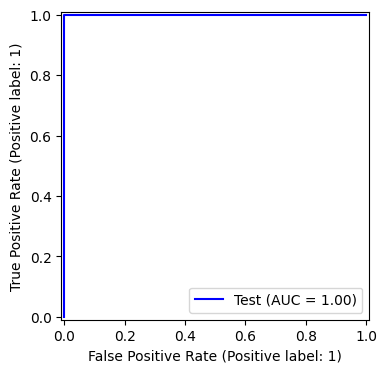

In [21]:
fig , ax = plt.subplots(figsize=(4, 4))
roc_curve(classifier, X_test, Y_test,
name='Test', color='b', ax=ax);